### Conditional density estimation with a neural spline flow

The model is as follows:
$$\mu \sim \text{Uniform}(-2, 2)$$
$$x_i \sim N(\mu, 1) \quad \text{for}\ i\ \text{in}\ \{1,2\}$$

We will try to infer the conditional distribution $p(x|\mu)$ using a conditional normalizing flow.


In [1]:
from jax import random
import jax.numpy as jnp
from flowjax.flows import NeuralSplineFlow
from flowjax.distributions import Normal
from flowjax.train_utils import train_flow
import matplotlib.pyplot as plt

In [2]:
key, x_key, cond_key = random.split(random.PRNGKey(0), 3)
cond = random.uniform(cond_key, (10000, 1), minval=-2, maxval=2)
x = random.normal(x_key, (10000, 2)) + cond

In [3]:
key, subkey = random.split(key)

flow = NeuralSplineFlow(
    key=subkey,
    base_dist=Normal(x.shape[1]),
    cond_dim=cond.shape[1])

key, subkey = random.split(key)
flow, losses = train_flow(subkey, flow, x, cond)

 40%|████      | 20/50 [01:45<02:38,  5.28s/it, train=2.83, val=2.85]

Max patience reached.


## Sampling
We can now sample from the flow, for example conditioning on $\mu = 1$, which should be approximately a two dimensional $N(1, 1)$.


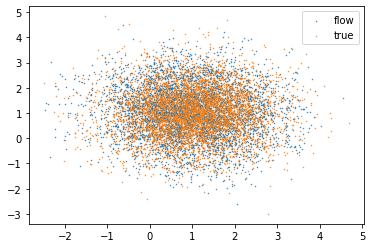

In [4]:
n = 5000
key, flow_key, true_key = random.split(key, 3)
mu = jnp.array([1])
sample = flow.sample(flow_key, condition=mu, n=n)
true = random.normal(true_key, sample.shape) + 1
plt.scatter(x = sample[:, 0], y = sample[:, 1], s=0.2, label="flow")
plt.scatter(x = true[:, 0], y = true[:, 1], s=0.2, label="true")
plt.legend()

Alternatively, we can provide a matrix of conditioning variables, to sample once for each row of the conditioning variable. For example, using $\mu \in [-2, 2]$

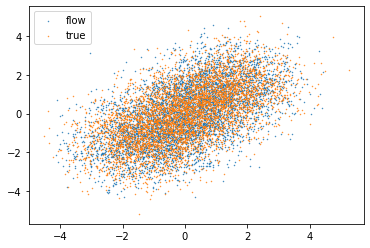

In [5]:
key, flow_key, true_key = random.split(key, 3)
mu = jnp.linspace(-2, 2, n)[:, None]
sample = flow.sample(flow_key, condition=mu)
true = random.normal(true_key, sample.shape) + mu
plt.scatter(x = sample[:, 0], y = sample[:, 1], s=0.2, label="flow")
plt.scatter(x = true[:, 0], y = true[:, 1], s=0.2, label="true")
plt.legend()